In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
customers = pd.read_csv(r"C:\Users\admin\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\admin\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\admin\Downloads\Transactions.csv")

In [35]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
#missing values
customers.fillna("Unknown", inplace=True)
products.fillna(products.mean(numeric_only=True), inplace=True)
transactions.fillna(0, inplace=True)

In [11]:
#Remove duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [13]:
# Merge all datasets into one for unified analysis
data = transactions.merge(customers, on="CustomerID", how="left")
data = data.merge(products, on="ProductID", how="left")

In [37]:
data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [15]:
# Basic statistics
print(data.describe())
print(data.info())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          

In [19]:
data.shape

(1000, 13)

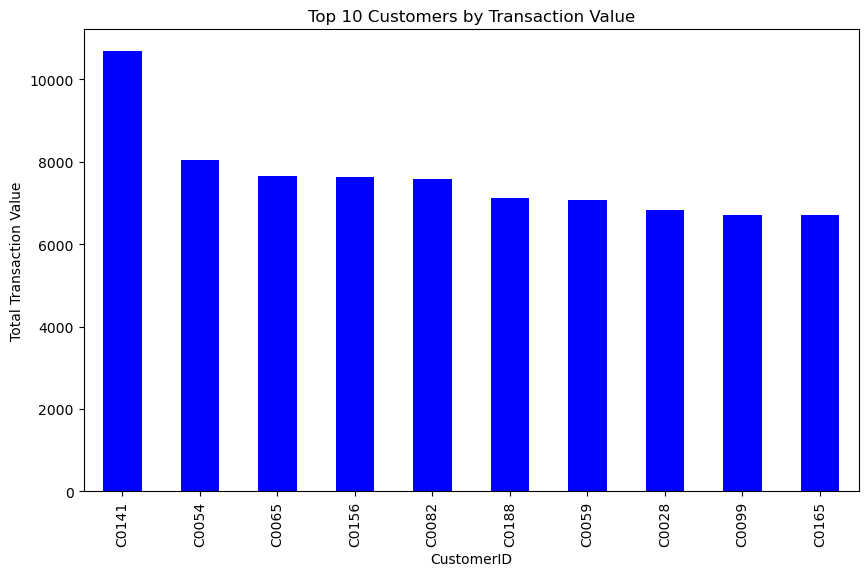

In [23]:
# Visualize top customers by transaction value
customer_values = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
customer_values.plot(kind='bar', color='blue')
plt.title('Top 10 Customers by Transaction Value')
plt.xlabel('CustomerID')
plt.ylabel('Total Transaction Value')
plt.show()

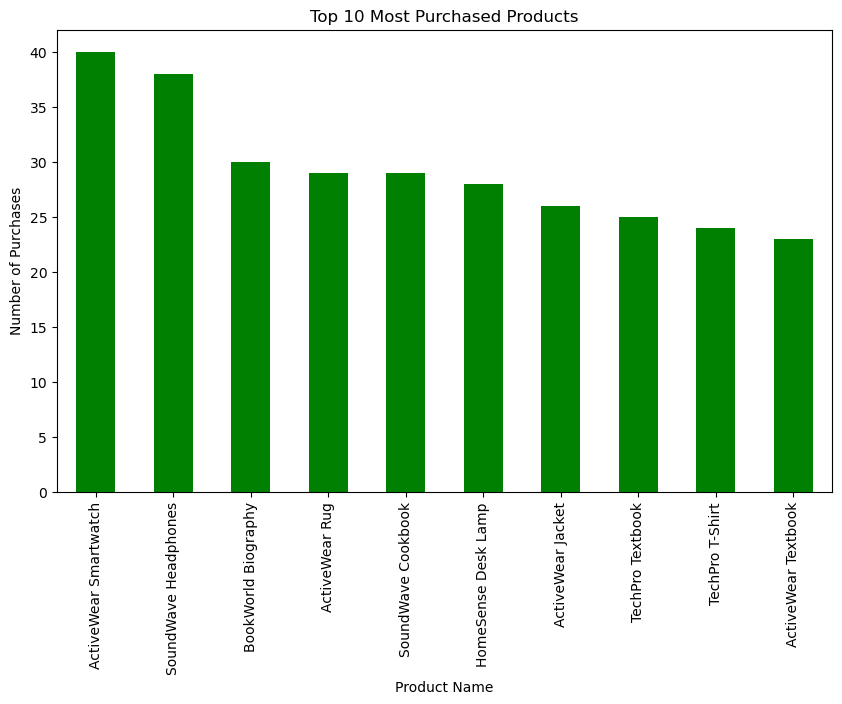

In [25]:
# Visualize most popular products
popular_products = data['ProductName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.show()

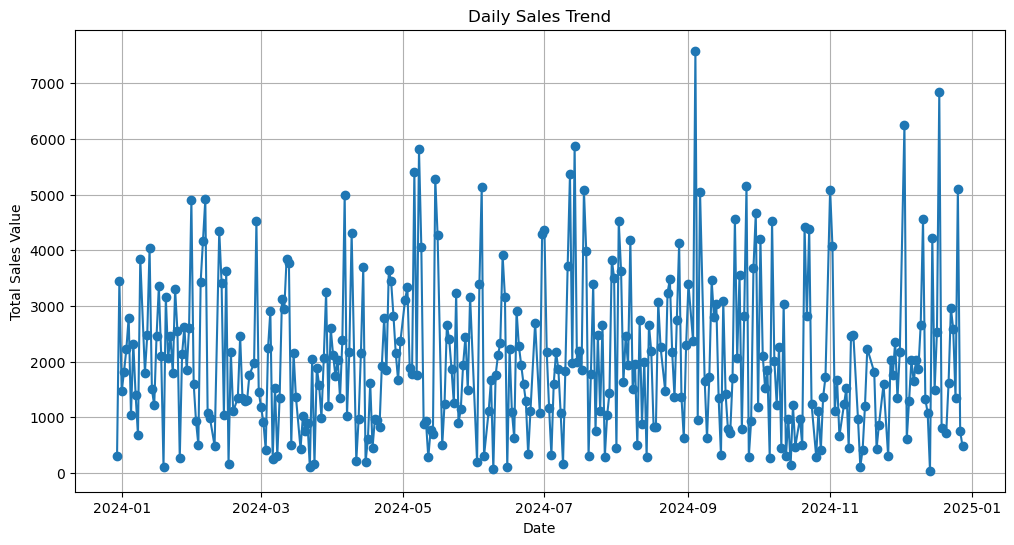

In [27]:
# Sales trends over time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
daily_sales = data.groupby(data['TransactionDate'].dt.date)['TotalValue'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()

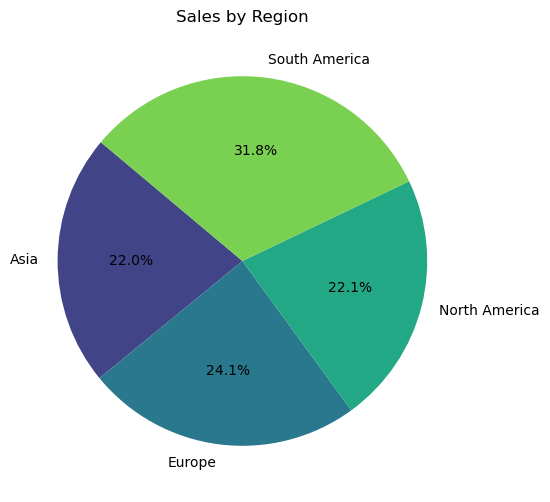

In [29]:
# Regional analysis
region_sales = data.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(region_sales)))
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

In [ ]:
# Save EDA results and cleaned data if we want to save the cleaned data
#customers.to_csv("Cleaned_Customers.csv", index=False)
#products.to_csv("Cleaned_Products.csv", index=False)
#data.to_csv("Merged_Data.csv", index=False)